## Prep

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
# shane's logs
# filepath = '/home/shane/minerl/logs/shane_logs/'

# nico's logs
#filepath = '/home/shane/minerl/logs/nico_logs/nico_logs2/'

# bre's logs
#filepath = '/home/shane/minerl/logs/bre_logs/'

# daniel's logs
filepath = '/Users/danielhustert/Documents/Uni/GT/Courses/DL/DiamondsInTheRough/log_parser/logs/daniel_logs/'

In [6]:
rx_dict = {
    'statistics': re.compile(r"statistics:(?P<statistics>.*)\n"),
    'result': re.compile(r"outdir:result/.* (?P<result>step:(\d+) episode:(\d+) R:(.*))\n"),
    'eval': re.compile(r"evaluation (?P<result>step:(\d+) episode:(\d+) R:(.*))\n")
}

def _parse_line(line):
    for key, rx in rx_dict.items():
        match = rx.search(line)
        if match:
            #print(key)
            return key, match
    return None, None

## Pretraining detailed

In [10]:
# Get data 
statistics = []
rewards = []

with open(f"{filepath}pretrain_25/log.txt", 'r') as f:
    for line in f:
        key, match = _parse_line(line)
        if key == 'statistics':
            # replace nan with 0
            stats = match.group('statistics').replace('nan', '0.0')
            # convert the list of tuples into a dict
            statistics.append(dict(eval(stats)))
            
        if key == 'result':
            result = match.group('result').replace('nan', '0.0').split()
            rewards.append(dict(map(lambda s : s.split(':'), result)))
            # the dict values are strings, should be int. convert here, or in dataframe?
            #print(step, episode, reward)

          
df_statistics = pd.DataFrame(statistics).apply(pd.to_numeric)

df_reward.drop_duplicates(keep='first', inplace=True)
df_statistics.drop_duplicates(keep='first', inplace=True)


    average_loss_1step  average_loss_nstep  average_loss_supervised  \
0             0.219894            0.097986                 1.147220   
2             0.120933            0.123412                 0.336198   
4             0.066886            0.085681                 0.159661   
6             0.051291            0.066138                 0.037717   
8             0.044531            0.056237                 0.009403   
10            0.037629            0.048182                 0.005375   
12            0.037051            0.043362                 0.007171   
14            0.034178            0.036723                 0.002510   
16            0.031619            0.032230                 0.003286   
18            0.029407            0.031768                 0.001734   
20            0.028100            0.029183                 0.002501   
22            0.023927            0.025970                 0.003128   
24            0.023305            0.026399                 0.002843   
26    

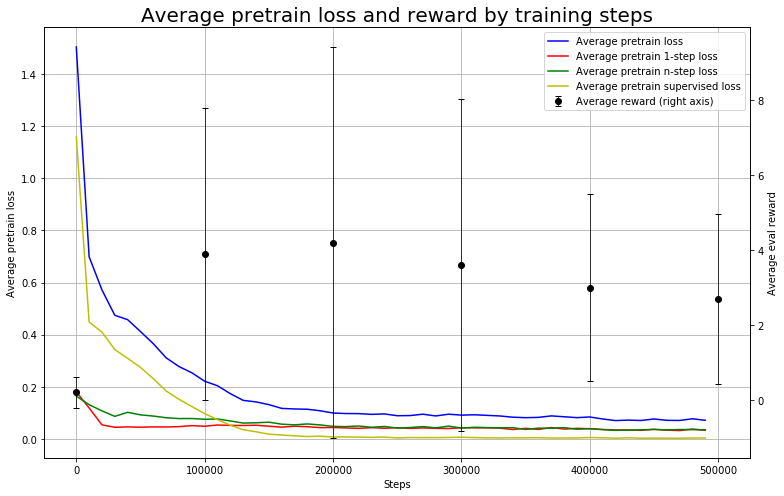

In [69]:
# Create plot
fig, ax = plt.subplots(figsize=(11,7))
l1 = ax.plot(df_statistics.n_updates, df_statistics.average_loss, label = 'Average pretrain loss', color='b')
l2 = ax.plot(df_statistics.n_updates, df_statistics.average_loss_1step, label = 'Average pretrain 1-step loss', color='r')
l3 = ax.plot(df_statistics.n_updates, df_statistics.average_loss_nstep, label = 'Average pretrain n-step loss', color='g')
l4 = ax.plot(df_statistics.n_updates, df_statistics.average_loss_supervised, label = 'Average pretrain supervised loss', color='y')

# Evaluations
x = [0, 100000, 200000, 300000, 400000, 500000]
evals = [0.2, 3.9, 4.2, 3.6, 3.0, 2.7]
stdev = [0.42, 3.900142447541001, 5.223876806442596, 4.427188724235731, 2.494438257849294, 2.263232692902394]
ax2 = ax.twinx()
l5 = ax2.errorbar(x, evals, yerr=stdev, fmt='o', label='Average reward (right axis)', elinewidth=0.75, capsize=3, color='k')

# Create legend
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
labs = l1 + l2
hs = h1 + h2
ax.legend(hs, labs)

ax.set_title("Average pretrain loss and reward by training steps", fontsize=20)
ax.set_xlabel('Steps')
ax.set_ylabel('Average pretrain loss')
ax2.set_ylabel('Average eval reward')
ax.grid()
fig.tight_layout()

## Pretraining comparison

In [17]:
# Get data 
n_experts = [10, 25, 50, 100]
dict_reward = {}
dict_statistics = {}

for e in n_experts:
    statistics = []
    rewards = []
    fp = filepath + 'pretrain_' + str(e)  
    with open(f"{fp}/log.txt", 'r') as f:
        for line in f:
            key, match = _parse_line(line)
            if key == 'statistics':
                # replace nan with 0
                stats = match.group('statistics').replace('nan', '0.0')
                # convert the list of tuples into a dict
                statistics.append(dict(eval(stats)))
                
            if key == 'result':
                result = match.group('result').replace('nan', '0.0').split()
                rewards.append(dict(map(lambda s : s.split(':'), result)))
                # the dict values are strings, should be int. convert here, or in dataframe?
                #print(step, episode, reward)
    
    df_reward = pd.DataFrame(rewards).apply(pd.to_numeric)
    df_statistics = pd.DataFrame(statistics).apply(pd.to_numeric)

    df_reward.drop_duplicates(keep='first', inplace=True)
    df_statistics.drop_duplicates(keep='first', inplace=True)

    dict_reward[e] = df_reward
    dict_statistics[e] = df_statistics

In [87]:
dict_statistics[10]

,average_loss_1step,average_loss_nstep,average_loss_supervised,average_loss,n_updates
0,0.157012,0.132489,1.175386,1.464886,1
2,0.121221,0.129256,0.112112,0.362589,10001
4,0.067989,0.073632,0.006623,0.148243,20001
6,0.043316,0.044998,0.002072,0.090386,30001
8,0.036260,0.040623,0.001659,0.078542,40001
10,0.032592,0.035568,0.000957,0.069117,50001
12,0.027929,0.031081,0.000841,0.059851,60001
14,0.025186,0.026788,0.001205,0.053179,70001
16,0.023974,0.025138,0.000609,0.049721,80001
18,0.019566,0.022786,0.000540,0.042892,90001


/Users/danielhustert/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/danielhustert/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/danielhustert/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


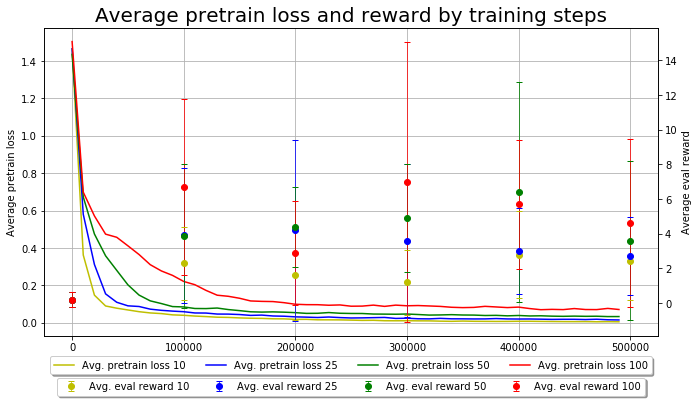

In [18]:
# Create plot
fig, ax = plt.subplots(figsize=(11,7))
ax2 = ax.twinx()
x = [0, 100000, 200000, 300000, 400000, 500000]
lns = []

# Manually insert
evaluations = {10: [0.2, 2.3, 1.6, 1.2, 2.8, 2.4], 
               25: [0.2, 3.9, 4.2, 3.6, 3.0, 2.7], 
               50: [0.2, 3.85, 4.4, 4.9, 6.4, 3.6], 
               100: [0.2, 6.7, 2.9, 7, 5.7, 4.6]}
stdev = {10: [0.42, 2.110818693198342, 2.590581230363393, 1.8737959096740262, 2.5298221281347035, 2.2211108331943574], 
         25: [0.42, 3.900142447541001, 5.223876806442596, 4.427188724235731, 2.494438257849294, 2.263232692902394], 
         50: [0.42, 4.148627617792552, 2.3190036174568114, 3.1073389830457114, 6.328067986711619, 4.59951688284], 
         100: [0.42, 5.1001089312985375, 2.998147576235848, 8.082903768654761, 3.7133393177689658, 4.835057163858332]}
cols = {10: 'y', 25: 'b', 50: 'g', 100: 'r'}

for e in n_experts: 
    # Pretraining
    a = ax.plot(dict_statistics[e].n_updates, dict_statistics[e].average_loss, color=cols[e], label = 'Avg. pretrain loss ' + str(e))
    lns += a

    # Evaluations
    evals = evaluations[e]
    stds = stdev[e]
    b = ax2.errorbar(x, evals, yerr=stds, fmt='o', label='Avg. eval reward ' + str(e), color=cols[e], elinewidth=0.75, capsize=3)
    lns += b

# Create legend
# h1, l1 = ax.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# labs = l1 + l2
# hs = h1 + h2
# ax.legend(hs, labs, loc='upper right', bbox_to_anchor=(1.1, 1.05))
# Shrink current axis's height by 10% on the bottom
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# Put a legend below current axis
# ax.legend(hs, labs, loc='upper center', framealpha=10)
# ax.legend(loc='upper left')
# ax2.legend(loc='upper right')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

# Shrink current axis's height by 10% on the bottom
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0 + box2.height * 0.1,
                 box2.width, box2.height * 0.9])

# Put a legend below current axis
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=5)

ax.set_title("Average pretrain loss and reward by training steps", fontsize=20)
ax.set_xlabel('Steps')
ax.set_ylabel('Average pretrain loss')
ax2.set_ylabel('Average eval reward')
ax.grid()

## DQFD

In [72]:
# Training dqfd

# First log file
statistics = []
rewards = []

with open(f"{filepath}pretrain_dqfd/log_1.txt", 'r') as f:
    for line in f:
        key, match = _parse_line(line)
        if key == 'statistics':
            # replace nan with 0
            stats = match.group('statistics').replace('nan', '0.0')
            # convert the list of tuples into a dict
            statistics.append(dict(eval(stats)))
            
        if key == 'result':
            result = match.group('result').replace('nan', '0.0').split()
            rewards.append(dict(map(lambda s : s.split(':'), result)))
            # the dict values are strings, should be int. convert here, or in dataframe?
            #print(step, episode, reward)

          
df_reward_1 = pd.DataFrame(rewards).apply(pd.to_numeric)
df_statistics_1 = pd.DataFrame(statistics).apply(pd.to_numeric)

# Remove duplicates
df_reward_1.drop_duplicates(keep='first', inplace=True)
df_statistics_1.drop_duplicates(keep='first', inplace=True)

df_train_1 = df_reward_1.join(df_statistics_1)

# Cut out learning after last saved model
df_train_1 = df_train_1[:151]

###
# Second log file
statistics = []
rewards = []
with open(f"{filepath}pretrain_dqfd/log_2.txt", 'r') as f:
    for line in f:
        key, match = _parse_line(line)
        if key == 'statistics':
            # replace nan with 0
            stats = match.group('statistics').replace('nan', '0.0')
            # convert the list of tuples into a dict
            statistics.append(dict(eval(stats)))
            
        if key == 'result':
            result = match.group('result').replace('nan', '0.0').split()
            rewards.append(dict(map(lambda s : s.split(':'), result)))
            # the dict values are strings, should be int. convert here, or in dataframe?
            #print(step, episode, reward)

          
df_reward_2 = pd.DataFrame(rewards).apply(pd.to_numeric)
df_statistics_2 = pd.DataFrame(statistics).apply(pd.to_numeric)

# Remove duplicates
df_reward_2.drop_duplicates(keep='first', inplace=True)
df_statistics_2.drop_duplicates(keep='first', inplace=True)

df_train_2 = df_reward_2.join(df_statistics_2)

# Cut out learning after last saved model
df_train_2 = df_train_2[:151]

###
# Concat
episodes_1 = int(df_train_1.episode[-1:])
episodes_2 = int(df_train_2.episode[-1:])

steps_1 = int(df_train_1.step[-1:])
steps_2 = int(df_train_2.step[-1:])

n_updates_1 = int(df_train_1.n_updates[-1:])
n_updates_2 = int(df_train_2.n_updates[-1:])

df_train_2['episode'] += episodes_1 + 1
df_train_2['step'] += steps_1 + 1
df_train_2['n_updates'] += n_updates_1 + 1

df_train = pd.concat([df_train_1, df_train_2])



In [74]:
df_train

,step,episode,R,average_loss_1step,average_loss_nstep,average_loss_supervised,average_loss,n_updates
0,2000,0,0.0,0.220777,0.262876,0.505449,0.989102,500
2,4000,1,0.0,0.166023,0.211626,0.437048,0.814697,1000
4,6000,2,0.0,0.130795,0.193174,0.399649,0.723619,1500
6,8000,3,2.0,0.117520,0.165107,0.374587,0.657213,2000
8,10000,4,3.0,0.109200,0.156793,0.333441,0.599434,2500
...,...,...,...,...,...,...,...,...
292,593837,297,35.0,0.011910,0.030344,0.001232,0.043486,148459
294,595837,298,22.0,0.012303,0.030256,0.001484,0.044043,148959
296,597837,299,41.0,0.014608,0.030681,0.001263,0.046551,149459
298,599837,300,28.0,0.013852,0.034497,0.000929,0.049278,149959


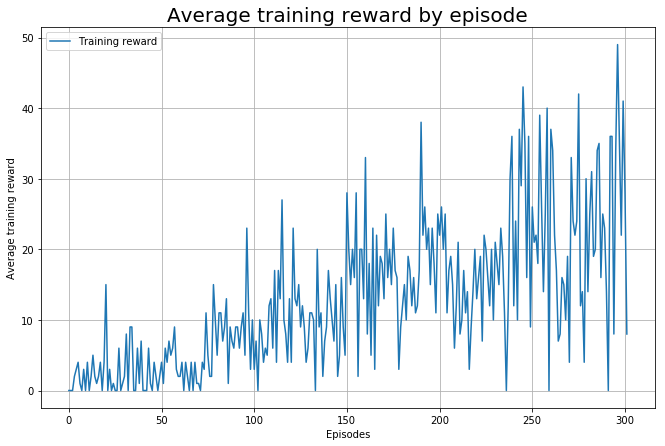

In [73]:
# Plot
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(df_train.episode, df_train.R, label = 'Training reward')

ax.set_title("Average training reward by episode", fontsize=20)
ax.set_xlabel('Episodes')
ax.set_ylabel('Average training reward')
ax.legend()
ax.grid()

/Users/danielhustert/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/danielhustert/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/danielhustert/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


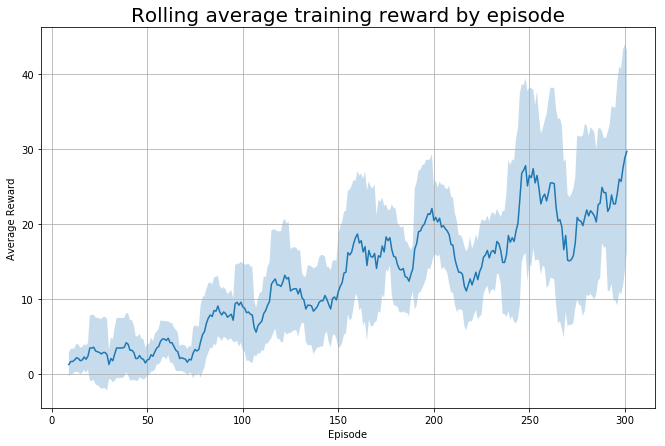

In [71]:
window = 10

mean = df_train['R'].rolling(window).mean()
sigma = df_train['R'].rolling(window).std()

fig, ax = plt.subplots(figsize=(11,7))
ax.plot(df_train.episode, mean, label='Average reward')
ax.fill_between(df_train.episode, mean+sigma, mean-sigma, alpha=0.25)
ax.set_title("Rolling average training reward by episode", fontsize=20)
#ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
ax.grid()

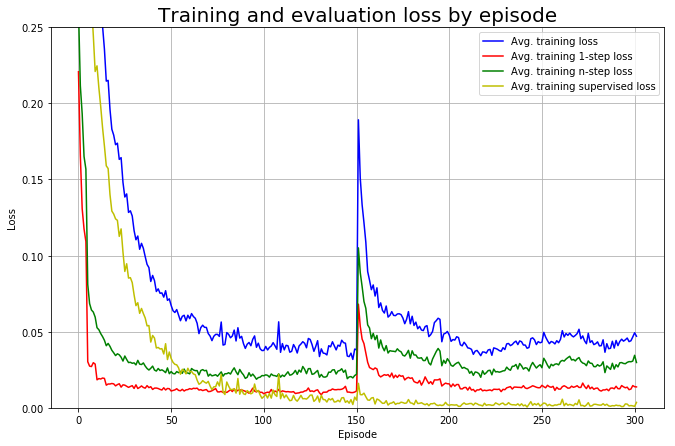

In [84]:
#method 2, plot with dots. I like this more

fig, ax = plt.subplots(figsize=(11,7))
ax.plot(df_train.episode, df_train.average_loss, label = 'Avg. training loss', color='b')
ax.plot(df_train.episode, df_train.average_loss_1step, label = 'Avg. training 1-step loss', color='r')
ax.plot(df_train.episode, df_train.average_loss_nstep, label = 'Avg. training n-step loss', color='g')
ax.plot(df_train.episode, df_train.average_loss_supervised, label = 'Avg. training supervised loss', color='y')

# ax.plot(df_train.episode, eval_loss, 'o-', label = 'Evaluation loss')
ax.set_title("Training and evaluation loss by episode", fontsize=20)
ax.legend()
ax.set_xlabel('Episode')
ax.set_ylabel('Loss')
plt.ylim((0, 0.25))
ax.grid()

## PDDDQN (not updated)

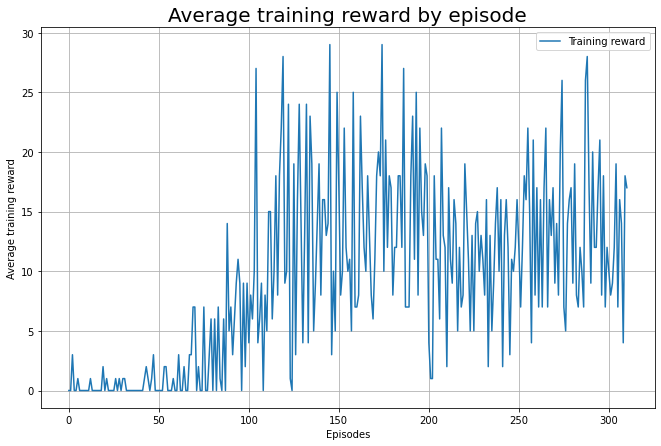

In [12]:
# First 30 or so eps before crash
statistics = []
rewards = []

with open(f"{filepath}500k_25/pdddqn_train.txt", 'r') as f:
    for line in f:
        key, match = _parse_line(line)
        if key == 'statistics':
            # replace nan with 0
            stats = match.group('statistics').replace('nan', '0.0')
            # convert the list of tuples into a dict
            statistics.append(dict(eval(stats)))
            
        if key == 'result':
            result = match.group('result').replace('nan', '0.0').split()
            rewards.append(dict(map(lambda s : s.split(':'), result)))
            # the dict values are strings, should be int. convert here, or in dataframe?
            #print(step, episode, reward)

          
df_reward_1 = pd.DataFrame(rewards).apply(pd.to_numeric)
df_statistics_1 = pd.DataFrame(statistics).apply(pd.to_numeric)

df_reward_1.drop_duplicates(keep='first', inplace=True)
df_statistics_1.drop_duplicates(keep='first', inplace=True)

# Remaining episodes #1
statistics = []
rewards = []

with open(f"{filepath}500k_25/pdddqn_train_3.txt", 'r') as f:
    for line in f:
        key, match = _parse_line(line)
        if key == 'statistics':
            # replace nan with 0
            stats = match.group('statistics').replace('nan', '0.0')
            # convert the list of tuples into a dict
            statistics.append(dict(eval(stats)))
            
        if key == 'result':
            result = match.group('result').replace('nan', '0.0').split()
            rewards.append(dict(map(lambda s : s.split(':'), result)))
            # the dict values are strings, should be int. convert here, or in dataframe?
            #print(step, episode, reward)

df_reward_2 = pd.DataFrame(rewards).apply(pd.to_numeric)
df_statistics_2 = pd.DataFrame(statistics).apply(pd.to_numeric)

df_reward_2.drop_duplicates(keep='first', inplace=True)
df_statistics_2.drop_duplicates(keep='first', inplace=True)

# Concat
new_episode_count = np.arange(38, 38 + df_reward_2.shape[0])
new_step_count = np.arange(78000, 78000 + df_reward_2.shape[0] * 2000, 2000)
df_reward_2['episode'] = new_episode_count
df_reward_2['step'] = new_step_count

df_reward = pd.concat([df_reward_1, df_reward_2])

# Remaining episodes # 2
statistics = []
rewards = []

with open(f"{filepath}500k_25/pdddqn_train_4.txt", 'r') as f:
    for line in f:
        key, match = _parse_line(line)
        if key == 'statistics':
            # replace nan with 0
            stats = match.group('statistics').replace('nan', '0.0')
            # convert the list of tuples into a dict
            statistics.append(dict(eval(stats)))
            
        if key == 'result':
            result = match.group('result').replace('nan', '0.0').split()
            rewards.append(dict(map(lambda s : s.split(':'), result)))
            # the dict values are strings, should be int. convert here, or in dataframe?
            #print(step, episode, reward)

df_reward_3 = pd.DataFrame(rewards).apply(pd.to_numeric)
df_statistics_3 = pd.DataFrame(statistics).apply(pd.to_numeric)

df_reward_3.drop_duplicates(keep='first', inplace=True)
df_statistics_3.drop_duplicates(keep='first', inplace=True)

# Concat
new_episode_count = np.arange(197, 197 + df_reward_3.shape[0])
new_step_count = np.arange(394000, 394000 + df_reward_3.shape[0] * 2000, 2000)
df_reward_3['episode'] = new_episode_count
df_reward_3['step'] = new_step_count

df_reward = pd.concat([df_reward, df_reward_3])







# Generate plot
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(df_reward.episode, df_reward.R, label = 'Training reward')

ax.set_title("Average training reward by episode", fontsize=20)
ax.set_xlabel('Episodes')
ax.set_ylabel('Average training reward')
ax.legend()
ax.grid()

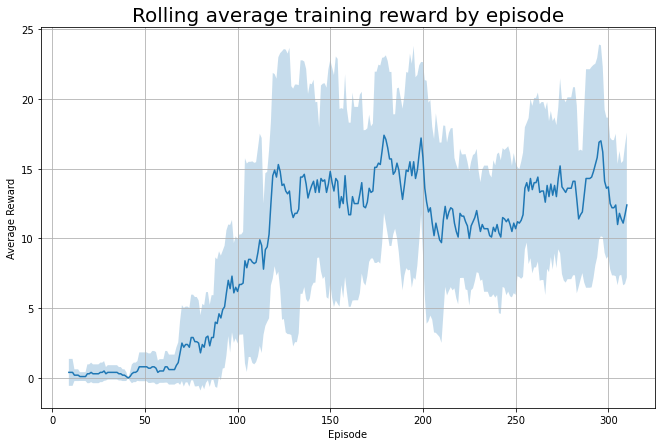

In [13]:
window = 10

mean = df_reward['R'].rolling(window).mean()
sigma = df_reward['R'].rolling(window).std()

fig, ax = plt.subplots(figsize=(11,7))
ax.plot(df_reward.episode, mean, label='Average reward')
ax.fill_between(df_reward.episode, mean+sigma, mean-sigma, alpha=0.25)
ax.set_title("Rolling average training reward by episode", fontsize=20)
#ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
ax.grid()

## Not used

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(df_reward.episode, df_reward.average_q, label = 'Average q value')
ax.set_title("Average Q value by training episode", fontsize=20)
ax.set_xlabel('Episode')
ax.set_ylabel('Average Q Value')
ax.grid()

In [ ]:
window = 10

mean = df_train['R'].rolling(window).mean()
sigma = df_train['R'].rolling(window).std()


fig, ax = plt.subplots(figsize=(11,7))
ax.plot(df.episode, mean, label='Average reward')
ax.fill_between(df.episode, mean+sigma, mean-sigma, alpha=0.25)
ax.set_title("Rolling average training reward by episode", fontsize=20)
#ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
ax.grid()

In [ ]:
df_scores = pd.read_csv(f"{filepath}scores.txt", sep="\t")
# prepend with e_ to signify evaluation
df_scores.columns = ['e_'+s for s in list(df_scores.columns)]
df_joined = df_train.join(df_scores.set_index('e_steps'), on='step')

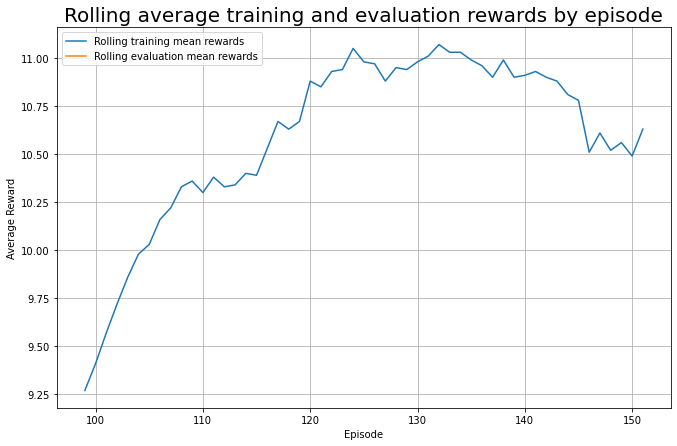

In [ ]:
window = 100

train_mean = df_joined['R'].rolling(window).mean()
#one method, interpolate to skip over nans
eval_mean = df_joined['e_mean'].interpolate(method='linear').rolling(window).mean()

fig, ax = plt.subplots(figsize=(11,7))
ax.plot(df_joined.episode, train_mean, label = 'Rolling training mean rewards')
ax.plot(df_joined.episode, eval_mean, label = 'Rolling evaluation mean rewards')
ax.set_title("Rolling average training and evaluation rewards by episode", fontsize=20)
ax.legend()
ax.set_xlabel('Episode')
ax.set_ylabel('Average Reward')
ax.grid()

In [ ]:
df_scores

,e_steps,e_episodes,e_elapsed,e_mean,e_median,e_stdev,e_max,e_min,e_average_q,e_average_loss,e_cumulative_steps,e_n_updates,e_rlen
0,151359,153,17929.546328,-14.276875,-16.605597,23.306074,27.145649,-51.026719,131.36403,1.912841,151359,36590,151359
1,300836,308,36825.814299,-24.645416,-21.171753,36.804569,26.639973,-96.306236,276.37677,4.910460,300836,73960,300000
2,450033,456,56030.610398,-0.476819,-6.456629,38.887919,144.680854,-39.142479,504.12363,7.457492,450033,111259,300000
3,601106,598,79717.889257,-9.344816,-7.980667,31.386551,50.282701,-67.118317,745.63885,12.086363,601106,149027,300000
4,750156,749,99309.454166,-22.893548,-10.307964,44.596432,30.906282,-127.931580,1087.81380,16.479201,750156,186290,300000
5,900838,902,119181.000124,-4.497449,-5.300489,31.617537,39.352953,-88.464684,2213.66380,38.337676,900838,223960,300000
